In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv('stock_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [3]:
open_stock = data.loc[:,['Open','Date']]

In [4]:
open_stock.shape

(4868, 2)

In [5]:
open_stock.isnull().sum()

Open    74
Date     0
dtype: int64

In [6]:
open_stock = open_stock = open_stock.dropna()
open_stock.shape

(4794, 2)

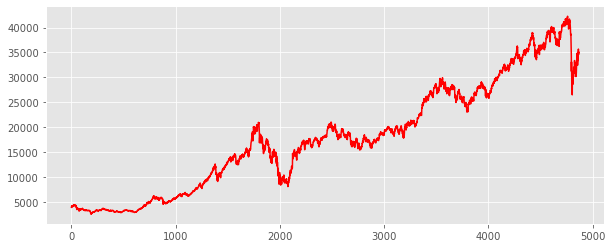

In [7]:
plt.style.use('ggplot')
ax = plt.figure(figsize = (10,4))
plt.plot(open_stock['Open'], color = 'red')
plt.show()

In [8]:
scaler = MinMaxScaler()
scaled_stocks = scaler.fit_transform(np.array(open_stock['Open']).reshape(-1,1))

In [9]:
input_seq = []
stock_value = []
seq_date = []
for i in range(40,len(scaled_stocks)):
    input_seq.append(scaled_stocks[i-40:i])
    stock_value.append(open_stock['Open'].iloc[i])
    seq_date.append(open_stock['Date'].iloc[i-1])
    
    
    

### Considering past 40 days sequence data

In [11]:
print(scaler.inverse_transform(input_seq[0]))
print(stock_value[0])
print(seq_date[1])

[[3953.219971]
 [3977.580078]
 [4180.970215]
 [4116.339844]
 [4164.759766]
 [4114.740234]
 [4151.580078]
 [4066.129883]
 [4059.409912]
 [4074.320068]
 [4052.179932]
 [4101.180176]
 [4106.149902]
 [4149.25    ]
 [4247.450195]
 [4277.830078]
 [4320.509766]
 [4327.839844]
 [4158.859863]
 [4269.410156]
 [4367.580078]
 [4303.129883]
 [4280.959961]
 [4337.52002 ]
 [4392.240234]
 [4376.919922]
 [4293.870117]
 [4395.439941]
 [4429.910156]
 [4437.319824]
 [4350.330078]
 [4372.600098]
 [4458.72998 ]
 [4363.790039]
 [4360.160156]
 [4338.310059]
 [4252.27002 ]
 [4261.810059]
 [4168.709961]
 [4140.629883]]
4070.3701170000004
2001-02-28


In [12]:
input_seq = np.array(input_seq)
stock_value = scaler.transform(np.array(stock_value).reshape(-1,1))

In [13]:
x_train = input_seq[:4650]
x_test = input_seq[4650:]
y_train = stock_value[:4650]
y_test = stock_value[4650:]

In [14]:
#Importing deep learning libraries
from tensorflow.keras.layers import Dense , LSTM, Dropout , Input
from tensorflow.keras.models import Model

In [15]:
#Defining the Model
inp = Input(shape = (40,1))

lstm1 = LSTM(60, return_sequences=True)(inp)
dropout1 = Dropout(0.4)(lstm1)

lstm3 = LSTM(50 , return_sequences = False )(dropout1)

dense1 = Dense(50, activation = 'tanh',kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm3)
dense2 = Dense(25, activation = 'tanh',kernel_regularizer=tf.keras.regularizers.l2(0.001))(dense1)
dropout3 = Dropout(0.3)(dense2)
dense3 = Dense(20, activation = 'tanh')(dropout3)
dense_output = Dense(1)(dense3)

model = Model(inputs = inp , outputs = dense_output)

In [16]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 40, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 40, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                22200     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0     

In [17]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128 , verbose = 1)

Epoch 1/10
37/37 [==============================] - 13s 338ms/step - loss: 0.1020 - val_loss: 0.0774
Epoch 2/10
37/37 [==============================] - 8s 206ms/step - loss: 0.0720 - val_loss: 0.0633
Epoch 3/10
37/37 [==============================] - 8s 229ms/step - loss: 0.0589 - val_loss: 0.0532
Epoch 4/10
37/37 [==============================] - 8s 216ms/step - loss: 0.0483 - val_loss: 0.0439
Epoch 5/10
37/37 [==============================] - 8s 208ms/step - loss: 0.0398 - val_loss: 0.0376
Epoch 6/10
37/37 [==============================] - 11s 296ms/step - loss: 0.0326 - val_loss: 0.0324
Epoch 7/10
37/37 [==============================] - 11s 303ms/step - loss: 0.0270 - val_loss: 0.0263
Epoch 8/10
37/37 [==============================] - 9s 230ms/step - loss: 0.0226 - val_loss: 0.0226
Epoch 9/10
37/37 [==============================] - 10s 279ms/step - loss: 0.0190 - val_loss: 0.0207
Epoch 10/10
37/37 [==============================] - 11s 289ms/step - loss: 0.0160 - val_loss: 0

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

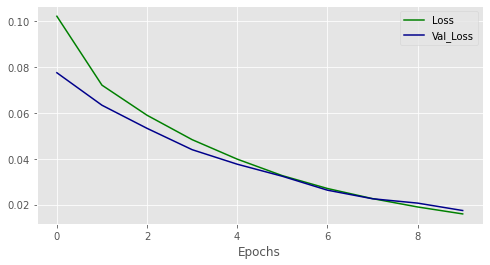

In [19]:
plt.figure(figsize = (8,4))
plt.plot(loss,color = 'green' , label = 'Loss')
plt.plot(val_loss,color = 'darkblue' , label = 'Val_Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [20]:
scores = model.predict(x_test, verbose=0)

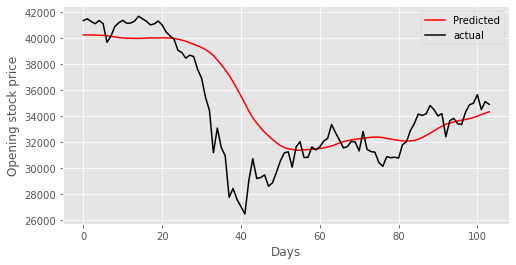

In [21]:
plt.style.use('ggplot')
plt.figure(figsize = (8,4))
plt.plot(scaler.inverse_transform(scores), color = 'red' , label = 'Predicted')
plt.plot(scaler.inverse_transform(y_test),color = 'black' , label = 'actual')
plt.xlabel('Days')
plt.ylabel('Opening stock price')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
mse = mean_absolute_error(scaler.inverse_transform(scores) ,scaler.inverse_transform(y_test) )

In [28]:
mse

1785.581542983173